In [ ]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import spatialdata_plot as _
from spatialdata import SpatialData
from spatialdata.models import PointsModel, TableModel

import squidpy as sq



## Downloading the Stereo-Seq dataset


```bash
!wget https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000104/stomics/S1-1_stereoseq.h5ad
```
If download link doesn't work check dataset website: https://db.cngb.org/stomics/datasets/STDS0000104/summary

## Dataset References


- Xu, Zhicheng et al. "STOmicsDB: a comprehensive database for spatial transcriptomics data sharing, analysis and visualization." Nucleic acids research vol. 52,D1 (2024): D1053-D1061. doi: 10.1093/nar/gkad933'

- Xia, Keke et al. “The single-cell stereo-seq reveals region-specific cell subtypes and transcriptome profiling in Arabidopsis leaves.” Developmental cell vol. 57,10 (2022): 1299-1310.e4. doi:10.1016/j.devcel.2022.04.011
  



In [71]:
adata_stereoseq = ad.read_h5ad("S1-1_stereoseq.h5ad")
adata_stereoseq.obs['region'] = 'points'
adata_stereoseq.obs.index = adata_stereoseq.obs.reset_index(drop=True).index
adata_stereoseq.obs['instance_id'] = adata_stereoseq.obs.index
mean_spatial = adata_stereoseq.obsm['spatial'].mean(axis=0)
var_spatial = adata_stereoseq.obsm['spatial'].var(axis=0)
adata_stereoseq.obsm['spatial'] = (adata_stereoseq.obsm['spatial'] - mean_spatial)/np.sqrt(var_spatial)

table = TableModel.parse(
    adata_stereoseq,
    region='points',
    region_key='region',
    instance_key='instance_id',
)
pm = PointsModel.parse(
    adata_stereoseq.obsm["spatial"],
)


sdata_stereoseq = SpatialData.init_from_elements(
    {"points": pm, "table": table},
)
sdata_stereoseq

/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


SpatialData object
├── Points
│     └── 'points': DataFrame with shape: (<Delayed>, 2) (2D points)
└── Tables
      └── 'table': AnnData (721, 18257)
with coordinate systems:
    ▸ 'global', with elements:
        points (Points)

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:708: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(


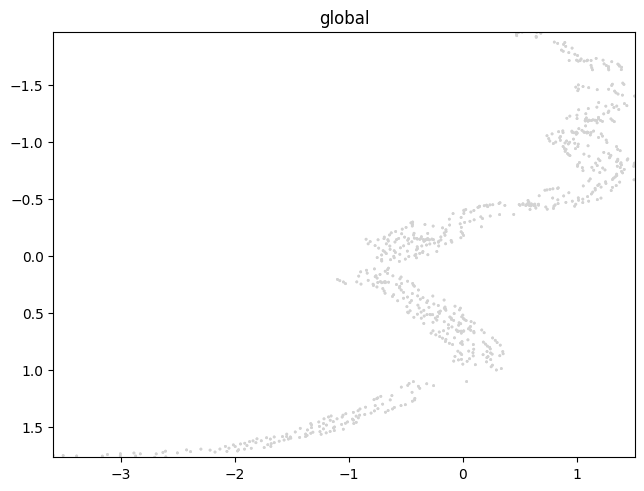

In [72]:
sdata_stereoseq.pl.render_points().pl.show()

In [96]:
sdata_stereoseq_filtered = sq.pp.filter_cells(sdata_stereoseq, min_genes=700, inplace=False)
sdata_stereoseq_filtered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 


/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object
├── Points
│     └── 'points': DataFrame with shape: (<Delayed>, 2) (2D points)
└── Tables
      └── 'table': AnnData (108, 18257)
with coordinate systems:
    ▸ 'global', with elements:
        points (Points)

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:708: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will b

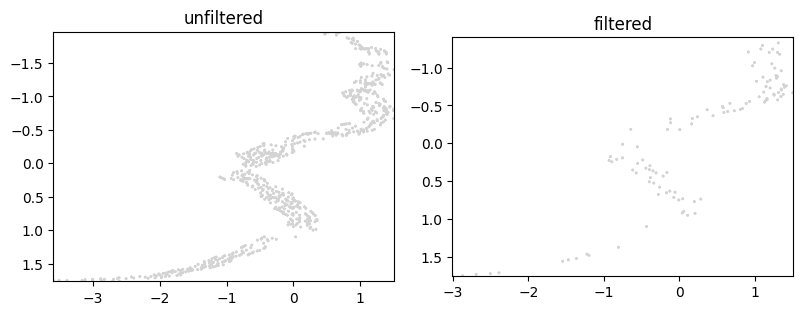

In [97]:

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

sdata_stereoseq.pl.render_points().pl.show(ax=axs[0], title="unfiltered")
sdata_stereoseq_filtered.pl.render_points().pl.show(ax=axs[1], title="filtered")

plt.tight_layout()
plt.show()